# Лабораторна робота №2
### Студента групи МІТ-31
### Переверзева Олексія

#### Частина 1

Генеруємо набір даних

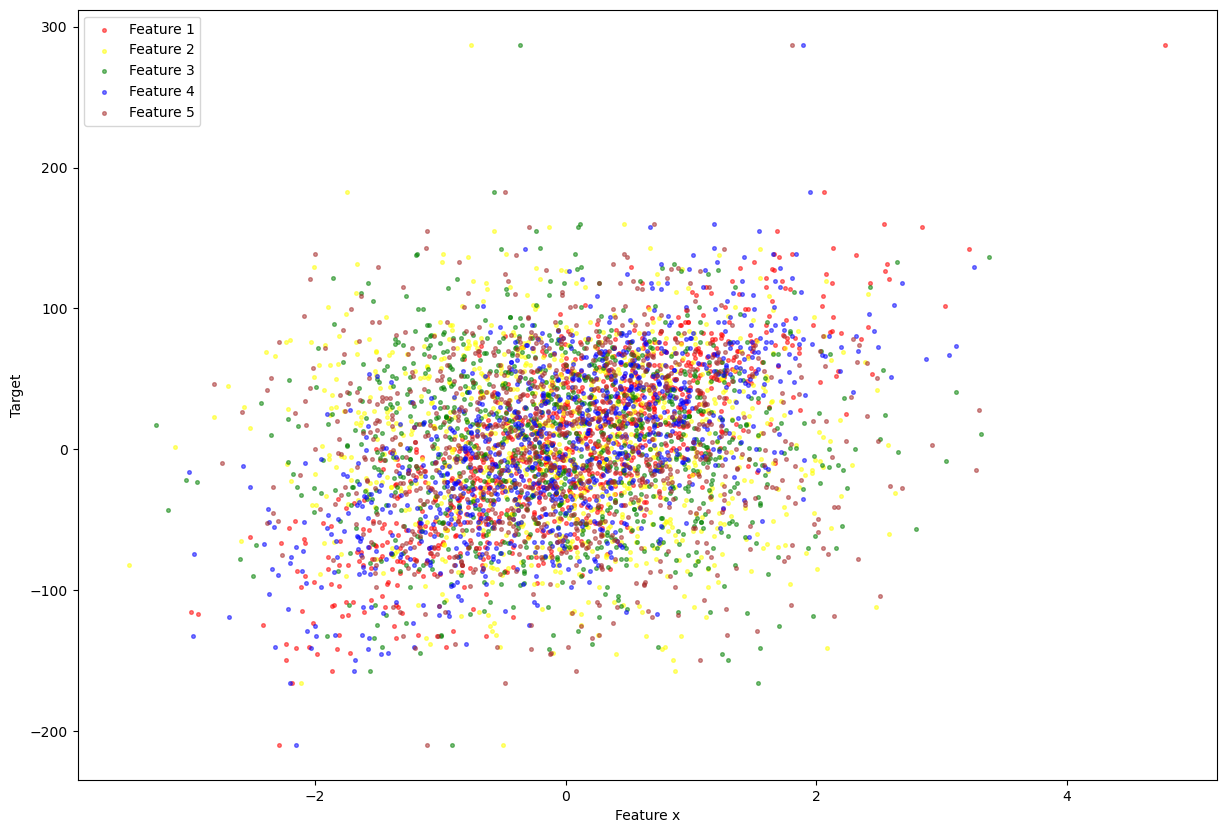

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression

n_features = 5
X, y = make_regression(
    n_samples=1000, # Кількість екземплярів
    n_features=n_features, # Кількість параметрів
    n_informative=3, # Кількість інформативних параметрів 
    noise=10, # Рівень шуму
    random_state=55
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(n_features)])
data['Target'] = y

data.to_csv('data_part1.csv', index=False)

# Візуалізуємо згенеровані дані
plt.figure(figsize=(50, 10))
plt.subplot(132)
colors = ['Red', 'Yellow', 'Green', 'Blue', 'Brown']
for i in range (n_features):
    plt.scatter(X[:, i], y, s=7, color= colors[i], label=f'Feature {i+1}', alpha=0.5)
plt.xlabel('Feature x')
plt.ylabel('Target')
plt.legend()
plt.show()


In [64]:

data = pd.read_csv('data_part1.csv')

# Перегляд перших декількох рядків даних
print("Перші 5 рядків:")
print(data.head(5))

# Вивести основні статистичні показники даних
print("\nСтатистика:")
print(data.describe())

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("\nІнформація про дані:")
print(data.info())


Перші 5 рядків:
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5      Target
0   0.339666  -0.905620  -0.158379  -0.606846  -0.531254   -2.005825
1   1.239457   0.059409  -0.682896  -0.821571   0.300079   26.943205
2  -0.118852   0.063033  -1.587383  -0.400065  -0.788022  -35.452999
3   1.086627  -1.394968   0.036313  -2.517610  -0.823808  -26.624624
4   2.543132   0.464966   0.115557   1.184680   0.709315  159.695369

Статистика:
         Feature 1    Feature 2    Feature 3    Feature 4    Feature 5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.067915    -0.002574    -0.038424     0.019913    -0.009830   
std       0.984198     0.992452     1.017417     1.008759     0.994395   
min      -2.992683    -3.482114    -3.272435    -3.008301    -2.808375   
25%      -0.618386    -0.655003    -0.783372    -0.644163    -0.696106   
50%       0.087657     0.018758    -0.063457     0.042191    -0.024118   
75%       0.703012     0.676437     0.6

Розподіл даних

In [65]:
# Розділення даних на тренувальний і тестовий набори у співвідношенні 80%/20%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

Побудова моделі регресії


MSE = 99.22 
R2 = 0.97


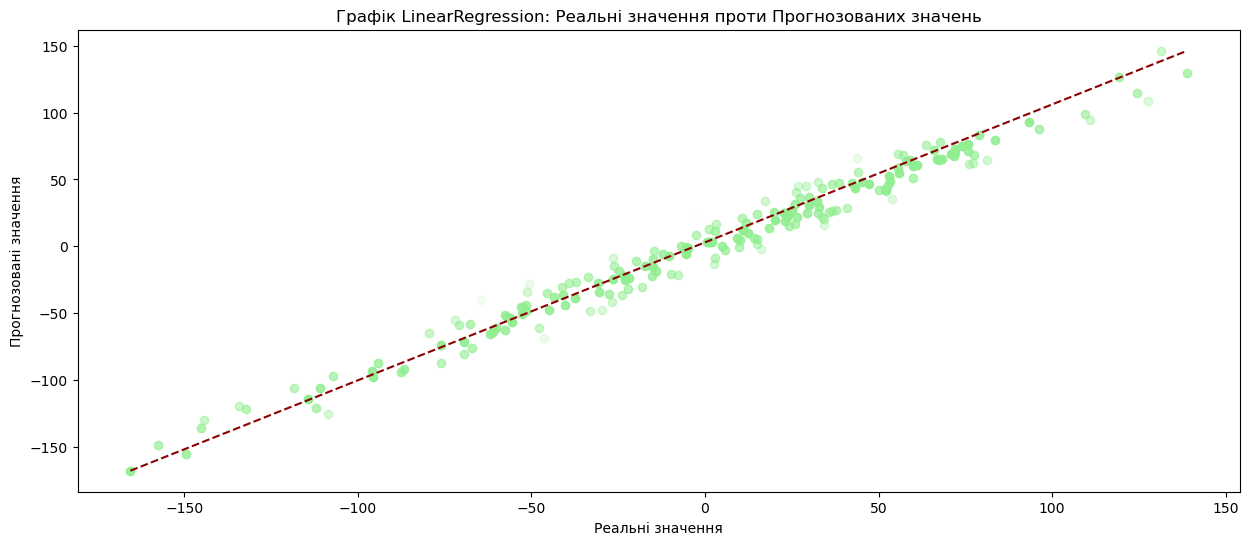

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Побудова моделі лінійної регресії
model_lr = LinearRegression()

# Тренування моделі
model_lr.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred_lr = model_lr.predict(X_test)

# Оцінка точності моделі
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"\nMSE = {mse_lr:.2f} \nR2 = {r2_lr:.2f}")

# Відстань між справжніми та прогнозованими значеннями
distance = np.abs(y_test - y_pred_lr) 
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distance) 

# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(15, 6))
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred_lr[i], c='lightgreen', alpha=alpha)

plt.title('Графік LinearRegression: Реальні значення проти Прогнозованих значень')
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], ls='--', c ='darkred')
plt.show()


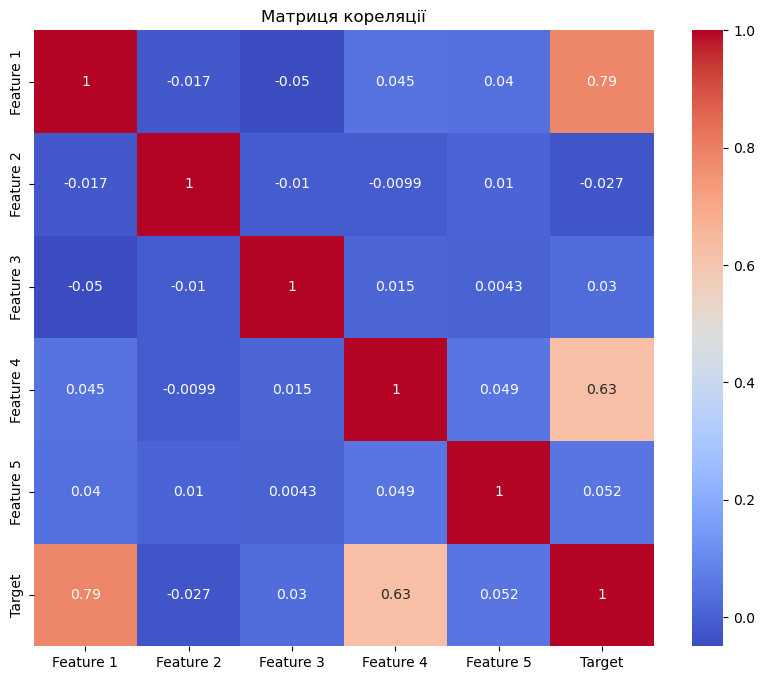

In [67]:
import seaborn as sb
correlation_matrix = data.corr()

# Візуалізація матриці кореляції
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

#### Частина 2

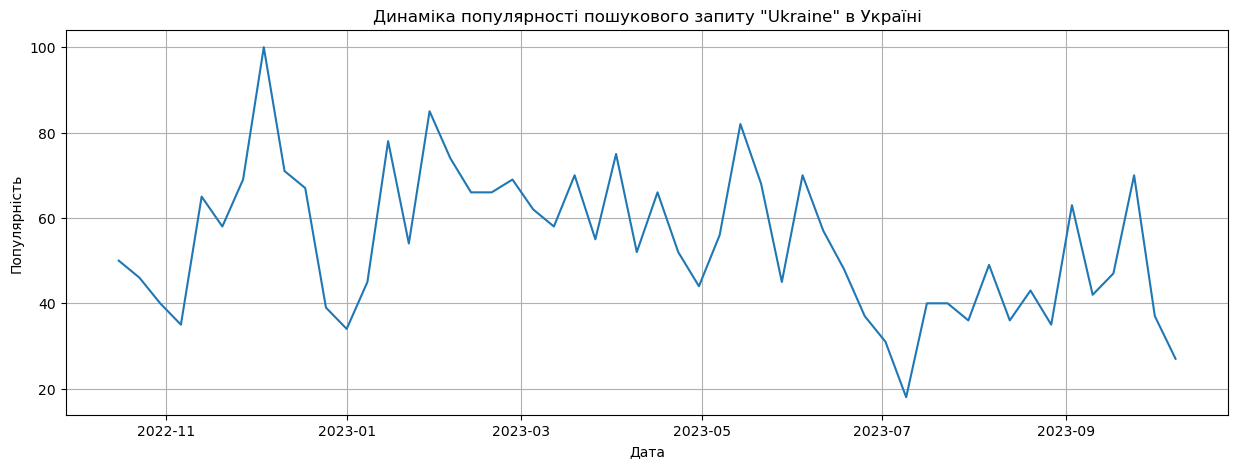

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('multiTimeline (1).csv', parse_dates=['Date'], index_col='Date')

# Числа позначають рівень інтересу до теми стосовно найвищого показника в таблиці для певного регіону та періоду часу. 
# 100 балів означають найвищий рівень популярності запиту, 50 – рівень популярності запиту, вдвічі менший порівняно з першим випадком. 
# 0 балів означає місце розташування, за яким недостатньо даних про розглянутий запит.

plt.figure(figsize=(15, 5))
plt.plot(data.index, data['Popularity'])
plt.grid()
plt.title('Динаміка популярності пошукового запиту "Ukraine" в Україні')
plt.xlabel('Дата')
plt.ylabel('Популярність')
plt.show()


In [81]:
from statsmodels.tsa.stattools import adfuller
# Перевірка стаціонарності часового ряду
result = adfuller(data)
print("---Augmented Dickey-Fuller тест:---")
print(f'ADF Statistic: {result[0]:.2f}')  #  if ADF is less than: -3,5 -> значить дані є стаціонарними
# p-value допомагає визначити, чи можна відхилити нульову гіпотезу. Якщо p-value менше за 0.05),
# ... ми відхиляємо нульову гіпотезу. Це означає, що у нас є достатні докази в тому, що наші 
# ... спостереження не є випадковими
print(f'p-value: {result[1]:.2f}')
print('Критичні значення:')
for key, value in result[4].items():
    print(f'{key}: {value:.2f}')

---Augmented Dickey-Fuller тест:---
ADF Statistic: -2.88
p-value: 0.05
Критичні значення:
1%: -3.57
5%: -2.92
10%: -2.60


#### Частина 3